# Visualizations - Batch vs. Iterative mode

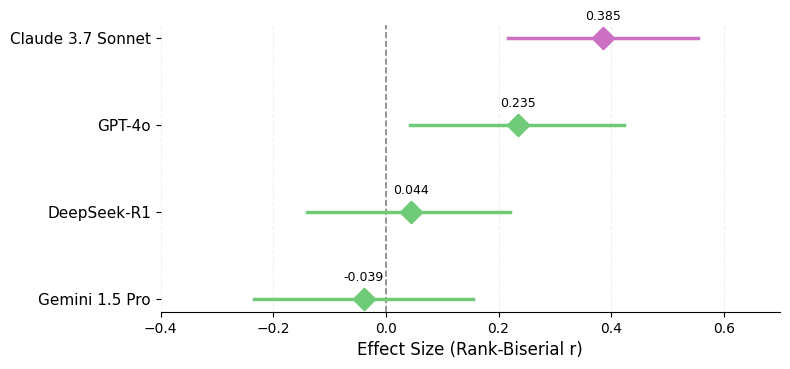

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

models = ['Claude 3.7 Sonnet', 'GPT-4o', 'DeepSeek-R1', 'Gemini 1.5 Pro']
effect_sizes = [0.385, 0.235, 0.044, -0.039]
ci_lower_plot = [0.217, 0.042, -0.140, -0.234]
ci_upper_plot = [0.554, 0.423, 0.221, 0.155]
p_values_plot = [0.036, 0.071, 0.981, 0.981]

sorted_indices = np.argsort(effect_sizes)[::-1]
models = [models[i] for i in sorted_indices]
effect_sizes = [effect_sizes[i] for i in sorted_indices]
ci_lower_plot = [ci_lower_plot[i] for i in sorted_indices]
ci_upper_plot = [ci_upper_plot[i] for i in sorted_indices]
p_values_plot = [p_values_plot[i] for i in sorted_indices]

fig1, ax1 = plt.subplots(figsize=(8, 4))
plt.style.use('default')

y_positions = np.arange(len(models))

colors = ['#cb70c3' if p < 0.05 else '#70cb78' for p in p_values_plot]

for i, (lower, upper, color) in enumerate(zip(ci_lower_plot, ci_upper_plot, colors)):
    ax1.plot([lower, upper], [i, i], color=color, linewidth=2.5, zorder=1)

for i, (es, color, p) in enumerate(zip(effect_sizes, colors, p_values_plot)):
    ax1.scatter(es, i, s=120, color=color, zorder=5,
                linewidths=1.5, marker='D')

    ax1.text(es, i - 0.25, f'{es:.3f}', va='center', ha='center',
             fontsize=9)

ax1.axvline(x=0, color='black', linestyle='--', linewidth=1.2, alpha=0.5, zorder=0)

ax1.set_yticks(y_positions)
ax1.set_yticklabels(models, fontsize=11)

ax1.invert_yaxis()

ax1.set_xlabel('Effect Size (Rank-Biserial r)', fontsize=12)
ax1.set_xlim(-0.4, 0.7)
ax1.tick_params(axis='x', labelsize=10)

ax1.xaxis.grid(True, linestyle='--', alpha=0.2)
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('../../results/plots/figure10.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

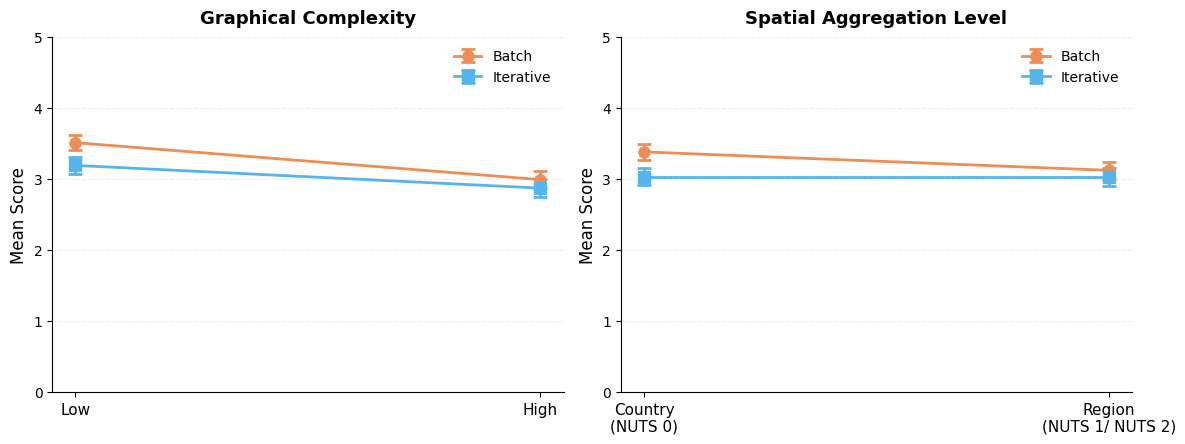

In [2]:
interaction_data = pd.DataFrame({
    'condition': ['Low/Batch', 'Low/Iterative', 'High/Batch', 'High/Iterative',
                  'Country/Batch', 'Country/Iterative', 'Region/Batch', 'Region/Iterative'],
    'mean': [3.51, 3.19, 2.99, 2.87, 3.38, 3.03, 3.12, 3.03],
    'se': [0.11, 0.12, 0.12, 0.13, 0.11, 0.12, 0.12, 0.13]
})

fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('default')

# Panel A: Graphical Complexity
complexity_batch = interaction_data[interaction_data['condition'].str.contains('Low|High') &
                                   interaction_data['condition'].str.contains('Batch')]
complexity_iter = interaction_data[interaction_data['condition'].str.contains('Low|High') &
                                  interaction_data['condition'].str.contains('Iterative')]

x_pos = [0, 1]
batch_means = [complexity_batch.iloc[0]['mean'], complexity_batch.iloc[1]['mean']]
iter_means = [complexity_iter.iloc[0]['mean'], complexity_iter.iloc[1]['mean']]
batch_se = [complexity_batch.iloc[0]['se'], complexity_batch.iloc[1]['se']]
iter_se = [complexity_iter.iloc[0]['se'], complexity_iter.iloc[1]['se']]

ax2a.errorbar(x_pos, batch_means, yerr=batch_se, marker='o', markersize=8,
             color='#ec8e56', linewidth=2, capsize=5, capthick=2, label='Batch', zorder=3)
ax2a.errorbar(x_pos, iter_means, yerr=iter_se, marker='s', markersize=8,
             color='#56b4ec', linewidth=2, capsize=5, capthick=2, label='Iterative', zorder=3)

ax2a.set_xticks(x_pos)
ax2a.set_xticklabels(['Low', 'High'], fontsize=11)
ax2a.set_ylabel('Mean Score', fontsize=12)
ax2a.set_ylim(0,5)
ax2a.yaxis.grid(True, linestyle='--', alpha=0.2)
ax2a.set_axisbelow(True)
ax2a.spines['top'].set_visible(False)
ax2a.spines['right'].set_visible(False)
ax2a.set_title('Graphical Complexity', fontsize=13, fontweight='bold', pad=10)
ax2a.legend(loc='upper right', fontsize=10, frameon=False)

# Panel B: Spatial Aggregation Level
nuts_batch = interaction_data[interaction_data['condition'].str.contains('Country|Region') &
                              interaction_data['condition'].str.contains('Batch')]
nuts_iter = interaction_data[interaction_data['condition'].str.contains('Country|Region') &
                            interaction_data['condition'].str.contains('Iterative')]

batch_means_nuts = [nuts_batch.iloc[0]['mean'], nuts_batch.iloc[1]['mean']]
iter_means_nuts = [nuts_iter.iloc[0]['mean'], nuts_iter.iloc[1]['mean']]
batch_se_nuts = [nuts_batch.iloc[0]['se'], nuts_batch.iloc[1]['se']]
iter_se_nuts = [nuts_iter.iloc[0]['se'], nuts_iter.iloc[1]['se']]

ax2b.errorbar(x_pos, batch_means_nuts, yerr=batch_se_nuts, marker='o', markersize=8,
             color='#ec8e56', linewidth=2, capsize=5, capthick=2, label='Batch', zorder=3)
ax2b.errorbar(x_pos, iter_means_nuts, yerr=iter_se_nuts, marker='s', markersize=8,
             color='#56b4ec', linewidth=2, capsize=5, capthick=2, label='Iterative', zorder=3)

ax2b.set_xticks(x_pos)
ax2b.set_xticklabels(['Country\n(NUTS 0)', 'Region\n(NUTS 1/ NUTS 2)'], fontsize=11)
ax2b.set_ylabel('Mean Score', fontsize=12)
ax2b.set_ylim(0, 5)
ax2b.yaxis.grid(True, linestyle='--', alpha=0.2)
ax2b.set_axisbelow(True)
ax2b.spines['top'].set_visible(False)
ax2b.spines['right'].set_visible(False)
ax2b.set_title('Spatial Aggregation Level', fontsize=13, fontweight='bold', pad=10)
ax2b.legend(loc='upper right', fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.savefig('../../results/plots/figure11.png', dpi=300, bbox_inches='tight')
plt.show()